# This Project aims at analysing 12 months’ worth of sales data containing hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.


Importing all the necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Merging all the 12 months of sales data in a single CSV file

In [2]:
#using the os.listdir to extract everything that in there in our directory be it files or other directories
#doing the list comprehension for getting all the files in all_sales_data folder
files = [file for file in os.listdir("/content/all_sales_data")]

#creating an empty data frame in order to store the merged files
all_months_data = pd.DataFrame()

#concatenating all 12 files in to a single CSV
for file in files:
  #reading each and every file name and concatenating it
  df = pd.read_csv("/content/all_sales_data/"+ file)
  all_months_data = pd.concat([all_months_data, df])

#printing the first 5 rows of the merged data of 12 months
all_months_data.head()

all_months_data.to_csv("all_data.csv" , index=False)

FileNotFoundError: ignored

Reading in the updated Data Frame

In [7]:
all_data = pd.read_csv("/content/all_data (1).csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Solving some real-life sales problem.
### Ques1. What was the best month for sales and how much revenue was generated that month?



Inorder to do this task we need to :

1. First we will clean up the data to remove the NANs. We will just drop the rows that have NANs in them.

2. Finding the 'or's and deleting them.

3. Converting the quantity ordered and price of each to int and float type respectively.

4. Then, Augment our data with some additional columns first.
We will be adding :
*   Month Column
*   Sales Column





In [8]:
# Cleaning up the data

# Finding the rows having NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# Dropping the rows having NAN
all_data = all_data.dropna(how='any')
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Removing the 'or's

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [12]:
# Adding the month column

# converting Order date into string type data value and then reading the first 2 elements off it
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [11]:
# Converting the data types of Qty Ordered and Price Each
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [13]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [30]:
# Finally answering Ques1.

result = all_data.groupby("Month").sum()
#sorting the data by descending order to get the values in order of highest to lowest saling months
result.sort_values(by="Sales", ascending=False)

<ipython-input-30-c32b65b3b5bc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby("Month").sum()


,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
12,28098,4587263.05,4612287.14,359969,732524
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
3,16987,2788004.17,2803892.88,218936,447148
7,16051,2629541.07,2644747.38,206149,416732
8,13448,2230345.42,2244467.88,172289,353857
1,10903,1811768.38,1822256.73,139485,282440
11,10373,1649592.14,1659411.76,133918,271202
6,19,2527.52,2537.34,19,469


ValueError: ignored

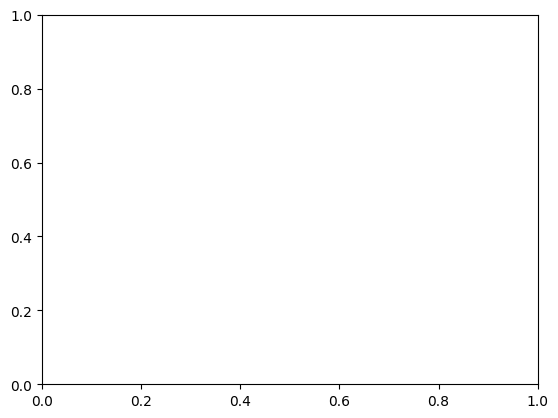

In [31]:
#Ploting this data using Matplotlib
months = range(1,13)
plt.bar(months, result["Sales"])
plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel("Sales in USD")
plt.title("Sales per month")

plt.show()

### Ques2. Which city sold the maximum product?

In order to answer this question:    
1. Need to add the City Column.
2. Removing the duplicates by checking the states.



In [17]:
# Adding the City Column using the .apply()
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(",")[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [18]:
# Printing the results of the city having highest sales
result = all_data.groupby("City").sum()
result.sort_values(by="Sales", ascending=False)

<ipython-input-18-26a2855c2f32>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby("City").sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),32642,5383127.71,195533,5415926.55
Los Angeles (CA),21338,3437002.56,126945,3457122.70
New York City (NY),18148,3017420.21,108652,3038032.50
Boston (MA),14596,2379468.78,86858,2395171.73
Dallas (TX),10819,1784030.01,64376,1793228.35
Atlanta (GA),10730,1770390.90,64407,1780568.63
Seattle (WA),10620,1763320.73,64397,1771631.51
Portland (OR),7270,1217888.08,43180,1224260.68
Austin (TX),7205,1163879.70,42899,1170068.12


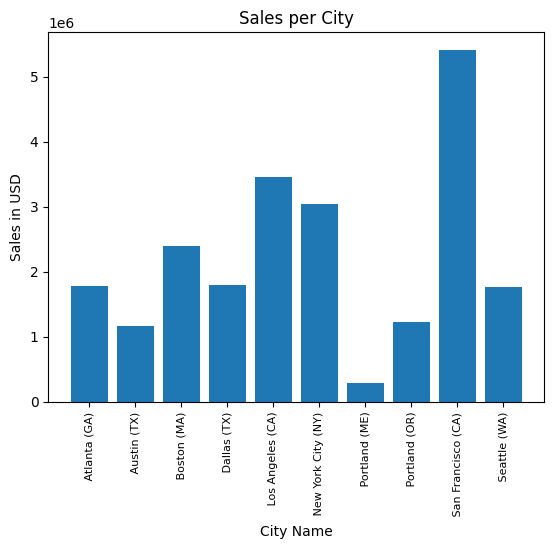

In [19]:
#Ploting this data using Matplotlib

city = [city for city, df in all_data.groupby("City")]

plt.bar(city, result["Sales"])
plt.xticks(city, rotation='vertical', size=8)
plt.xlabel("City Name")
plt.ylabel("Sales in USD")
plt.title("Sales per City")

plt.show()

### Ques3. What time should the store display advertisements to maximize the likelihood of customer’s buying product?

In order to answer this questions we need to :
1.   Use the Order Date through a datetime () method to access it in a easier way.



In [20]:
all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])

In [21]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


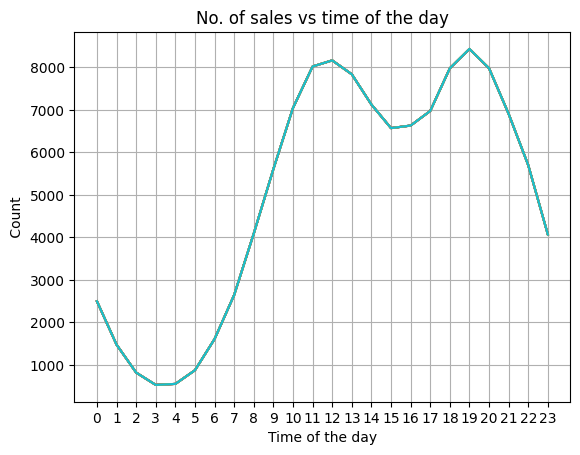

In [22]:
# Creating a line graph for visualising the same
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Time of the day")
plt.ylabel(" Count ")
plt.title("No. of sales vs time of the day")
plt.show()

### Ques4. What products are most often sold together?

In order to solve this question :    
1. We have to count the number of duplicate order IDs.

In [23]:
# Creating a new data frame where we can keep the duplicated order entry records
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11,19


In [24]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x) )
df.head()

<ipython-input-24-5f645023437c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x) )


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11,19,"Vareebadd Phone,Wired Headphones"


In [25]:
# Dropping the duplicates in this data
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [26]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
  row_list = row.split(',') #Creating the sublist and segrating by each comma
  count.update(Counter(combinations(row_list,2))) #if we change 2 by 3 or any other number we can see the most common 2 or 3 or n together bought items

count.most_common(10) #will print the top 10 most common together bought items

[(('iPhone', 'Lightning Charging Cable'), 669),
 (('Google Phone', 'USB-C Charging Cable'), 640),
 (('iPhone', 'Wired Headphones'), 281),
 (('Google Phone', 'Wired Headphones'), 265),
 (('iPhone', 'Apple Airpods Headphones'), 231),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 230),
 (('Google Phone', 'Bose SoundSport Headphones'), 136),
 (('USB-C Charging Cable', 'Wired Headphones'), 108),
 (('Vareebadd Phone', 'Wired Headphones'), 88),
 (('Lightning Charging Cable', 'Wired Headphones'), 50)]

### Ques5. What product sold the most?

In [27]:
product_group = all_data.groupby("Product")
product_group.sum()

<ipython-input-27-36f36fa12867>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group.sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,2667,291033.54,18109,293343.33,38082,78662
27in 4K Gaming Monitor,3976,1547870.31,27138,1550600.24,57925,118065
27in FHD Monitor,4868,726701.55,32071,730151.32,69637,141545
34in Ultrawide Monitor,4035,1528319.78,26988,1533259.65,57378,118868
AA Batteries (4-pack),17850,50960.64,89258,68544.00,192106,392760
AAA Batteries (4-pack),20162,40077.96,90729,60284.38,193224,395607
Apple Airpods Headphones,10096,1503000.00,67113,1514400.00,143702,292871
Bose SoundSport Headphones,8742,866413.35,58310,874112.58,124825,253154
Flatscreen TV,3108,929100.00,21242,932400.00,44486,93236


In [28]:
quantity_ordered = product_group.sum()["Quantity Ordered"]

<ipython-input-28-880c41c42c96>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


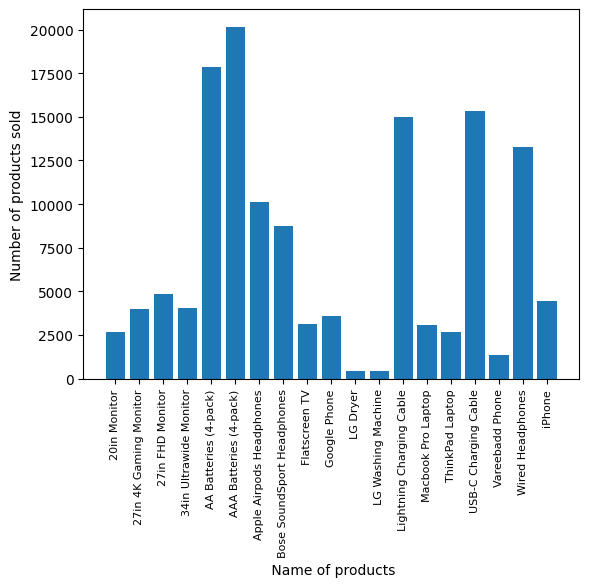

In [29]:
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size = 8)
plt.xlabel(" Name of products")
plt.ylabel("Number of products sold")
plt.show()